# Исследование объявлений о продаже квартир

В распоряжении имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### 1. Изучение общей информации 

#### 1.1 Импорт необходимых библиотек

Для начала импортируем все необходимые библиотеки для работы с данными и построением графиков.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None

import seaborn as sns
import matplotlib.pyplot as plt

#### 1.2 Изучение общей информации о датафрейме

Считаем данные из файла и запишем их в переменную **`data`**. Путь к файлу с данными: `datasets/real_estate_data.csv`.

Для правильного преобразования данных в формат **DataFrame** укажем в функции дополнительный параметр для разделения столбцов `sep='\t'`.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Выведем первые 10 строчек датафрейма на экран.

In [3]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Также выведем основную информацию о датафрейме с помощью метода **`info()`**.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Можно заметить, что в столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` присутствуют пропуски в данных.

Также для удобства дальнейшей работы с данными даты и времени для столбца **`first_day_exposition`** имеет смысль поменять тип данных с `object` на `datetime`.

Также дополнительно можно построить общую гистограмму для всех числовых столбцов таблицы при помощи команды **`hist()`**.

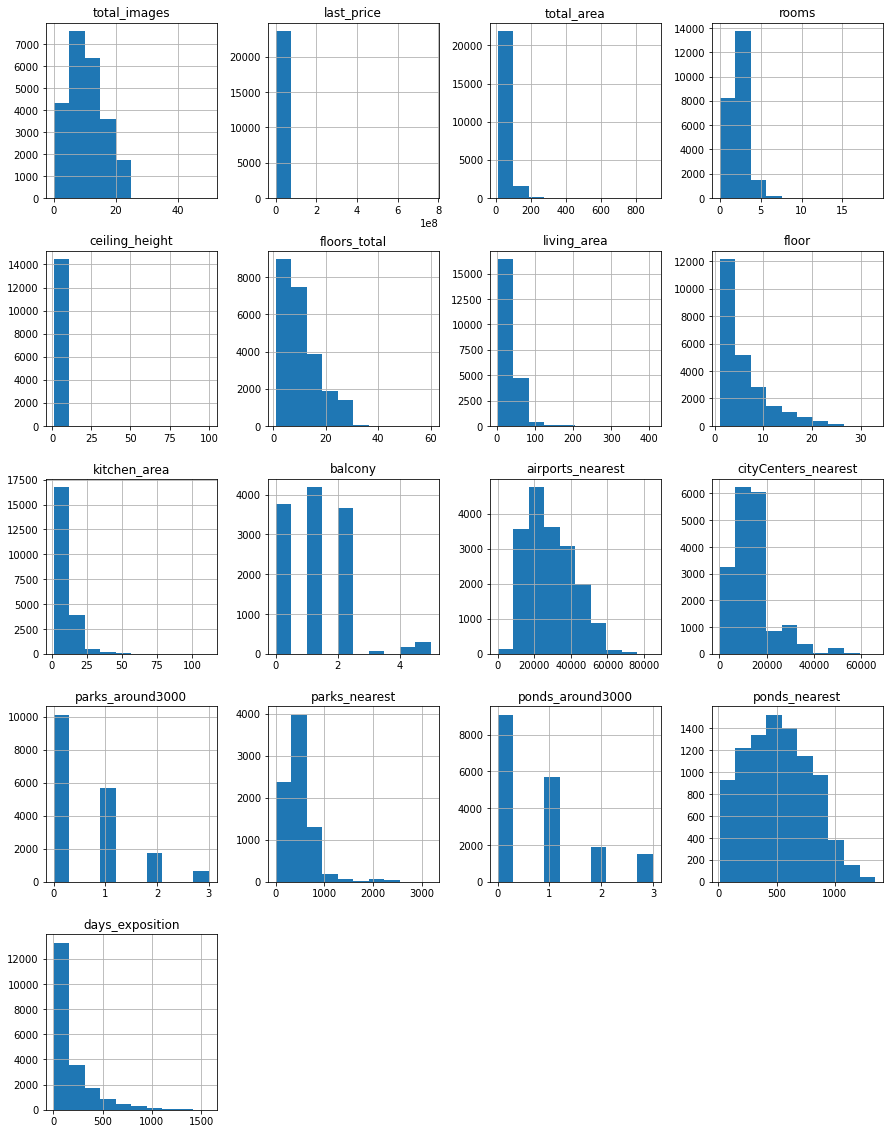

In [5]:
data.hist(figsize=(15, 20));

Большинство столбцов имеют либо нормальное распределение, либо распределение Пуассона для числовых значений, что первично может свидетельсвовать об "адекватности" исходных данных.

### 2. Предобработка данных

Поскольку названия всех столбцов уже написаны в одном стиле, удобном для дальнейшей работы с ними, то изменять их не имеет смысла.

#### 2.1 Обработка пропусков в данных

Займемся обработкой пропусков в данных. Как уже было замечено ранее, пропуски присутствуют в более половины от общего числа всех столбцов. Выведем количество пропущенных значений для каждого столбца.

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Как можно заметить, пропуски оказались в тех же столбцах, что и были отмечены ранее.

В столбце `is_apartment` процент пропусков оказался в районе **88%** от общей выборки, поэтому имеет смысл удалить его. 

Также наибольшее количество пропусков оказалось в столбцах `parks_nearest` и `ponds_nearest`, в районе **64%**. Однако, эти столбцы являются схожими по смыслу с `parks_around3000` и `ponds_around3000`, так что их тоже можно удалить из исходного датасета.

In [7]:
data = data.drop(columns=['is_apartment', 'parks_nearest', 'ponds_nearest'])

Большое количество пропусков также присутствует и в столбце `balcony`. Если в объявлении о продаже не указано число балконов, то вероятнее всего в квартире он просто отсутствует. Заменим все пропуски в данном столбце на значение 0.

In [8]:
data['balcony'] = data['balcony'].fillna(0)

Заполним пропуски для столбцов `living_area`, `ceiling_height` и `kitchen_area`. Для этого возьмем медианные значения для этих столбцов для разного количества комнат в квартире (по столбцу `rooms`).

Но для того, чтобы использовать данный столбец для расчета медианных значений по группам, необходимо проверить его на выбросы.

In [9]:
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Видно, что в данном столбце имеется значение 0, и также аномально большие (больше 6). Удалим строки с этими значениями из исходного датафрейма.

In [10]:
data = data[(data['rooms'] != 0) & (data['rooms'] <= 6)]

Теперь же после очистки от аномальных значений можно заполнить пропуски и в 3-х ранее указанных столбцах.

In [11]:
for num in data['rooms'].unique():
    data.loc[(data['rooms'] == num) & (data['living_area'].isna()), 'living_area'] = data.loc[(data['rooms'] == num), 'living_area'].median()
    data.loc[(data['rooms'] == num) & (data['kitchen_area'].isna()), 'kitchen_area'] = data.loc[(data['rooms'] == num), 'kitchen_area'].median()
    data.loc[(data['rooms'] == num) & (data['ceiling_height'].isna()), 'ceiling_height'] = data.loc[(data['rooms'] == num), 'ceiling_height'].median()

Обработаем пропуски в `locality_name`. Поскольку количество строк с пропущенными значениями составляет **менее 1%** от общей выборки, то можем смело их удалить.

In [12]:
data = data.dropna(subset=['locality_name'])

Для столбца `floors_total` текущее значение `floor` укажем для каждой строки с пропуском.

In [13]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

Проверим, что все пропуски были обработаны.

In [14]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5452
cityCenters_nearest     5430
parks_around3000        5429
ponds_around3000        5429
days_exposition         3137
dtype: int64

Столбцы `airports_nearest`, `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` оставим с пропусками.

Обработав большинство пропусков в данных, можно сделать вывод, что почти все они могли быть вызваны человеческим фактором или технической ошибкой.

#### 2.2 Изменение типов данных

Перейдем к изменению типов данных. Для начала выведем еще раз информацию о всех столбцах в датафрейме.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23363 entries, 0 to 23698
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23363 non-null  int64  
 1   last_price            23363 non-null  float64
 2   total_area            23363 non-null  float64
 3   first_day_exposition  23363 non-null  object 
 4   rooms                 23363 non-null  int64  
 5   ceiling_height        23363 non-null  float64
 6   floors_total          23363 non-null  float64
 7   living_area           23363 non-null  float64
 8   floor                 23363 non-null  int64  
 9   studio                23363 non-null  bool   
 10  open_plan             23363 non-null  bool   
 11  kitchen_area          23363 non-null  float64
 12  balcony               23363 non-null  float64
 13  locality_name         23363 non-null  object 
 14  airports_nearest      17911 non-null  float64
 15  cityCenters_nearest

Как и указывалось ранее, изменим тип данных у столбца `first_day_exposition` на **datetime** для более удобной работы с ним.

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Изменим тип данных у столбцов `floors_total`, `balcony` и `days_exposition` на **int**, поскольку тип **float** в данном случае является избыточным.

In [17]:
data = data.astype({'floors_total' : 'int64', 'balcony' : 'int64'})

Проверим, что типы данных в столбцах поменялись.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23363 entries, 0 to 23698
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23363 non-null  int64         
 1   last_price            23363 non-null  float64       
 2   total_area            23363 non-null  float64       
 3   first_day_exposition  23363 non-null  datetime64[ns]
 4   rooms                 23363 non-null  int64         
 5   ceiling_height        23363 non-null  float64       
 6   floors_total          23363 non-null  int64         
 7   living_area           23363 non-null  float64       
 8   floor                 23363 non-null  int64         
 9   studio                23363 non-null  bool          
 10  open_plan             23363 non-null  bool          
 11  kitchen_area          23363 non-null  float64       
 12  balcony               23363 non-null  int64         
 13  locality_name   

#### 2.3 Обработка дубликатов

Проверим исходный датафрейм на наличие явных строк-дубликатов.

In [19]:
data.duplicated().sum()

0

Как можно заметить, явных дубликатов в исходной выборке данных нет.

 Далее устраним неявные дубликаты. Для этого рассмотрим уникальные значения для столбца `locality_name`.

In [20]:
place = data['locality_name'].sort_values()
place.unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Также можно посчитать количество уникальных значений в данном столбце.

In [21]:
data['locality_name'].nunique()

362

Можно заметить, что имеются различные виды написания, например "посёлок" и "поселок". Для исключения неявных дубликатов заменим все буквы "ё" на "е".

In [22]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

То же самое проделаем для "городской поселок", "коттеджный поселок", "поселок городского типа", "поселок станции", "поселок при железнодорожной станции". Заменим все эти значения на слово "поселок".

In [23]:
replacement = ['городской поселок', 'коттеджный поселок', 'поселок городского типа', 'поселок станции', 'поселок при железнодорожной станции']

for name in replacement:
    data['locality_name'] = data['locality_name'].str.replace(name, 'поселок')

После всех проведенных преобразований проверим количество уникальных значений в данном столбце.

In [24]:
data['locality_name'].nunique()

316

Нетрудно отметить, что число уникальных значений в данном столбце сократилось, что, в свою очередь, может свидетельствовать о соркащении количества неявных дубликатов.

#### 2.4 Обработка аномальных значений

В исходной выборке данных могут встречаться артефакты (аномалии) – значения, которые не отражают действительность и появились по какой-либо ошибке. В данном разделе постараемся разобраться с ними.

Для оценки значений в каждом столбце воспользуемся методом **`describe()`**.

In [25]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,ponds_around3000,days_exposition
count,23363.000000,2.336300e+04,23363.000000,23363.000000,23363.000000,23363.000000,23363.000000,23363.000000,23363.000000,23363.000000,17911.000000,17933.000000,17934.000000,17934.000000,20226.000000
mean,9.876429,6.394687e+06,59.748409,2.064589,2.718608,10.640885,33.912977,5.876771,10.409524,0.589222,28853.999274,14245.214911,0.610349,0.767258,181.130476
std,5.680121,8.780590e+06,31.942092,0.993290,0.982705,6.569403,19.593695,4.867354,5.513526,0.959383,12653.914465,8617.370961,0.800209,0.936938,219.860144
min,0.000000,1.219000e+04,12.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,0.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.500000,2.000000,7.300000,0.000000,18573.500000,9324.000000,0.000000,0.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.640000,9.000000,30.400000,4.000000,9.040000,0.000000,26832.000000,13135.000000,0.000000,0.000000,96.000000
75%,14.000000,6.750000e+06,69.515000,3.000000,2.700000,16.000000,42.600000,8.000000,11.500000,1.000000,37364.000000,16300.000000,1.000000,1.000000,232.000000
max,50.000000,4.013000e+08,507.000000,6.000000,100.000000,60.000000,301.500000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3.000000,1580.000000


Столбец `rooms` ранее уже был очищен от выбросов. То же самое сделаем и с остальными.

Начнем со столбца `total_images`. Можем заметить, что минимальное его значение равно 0, а максимальное 50. Необходимо избавиться от строчек в датафрейме с подобными значениями. Зададим минимальную планку в объявлении в 1 фотографию, а максимальную – в 35.

In [26]:
data = data.query('1 <= total_images <= 35')

Далее рассмотрим столбец `last_price`. Судя по верхней таблице можно сделать вывод, что минимальное и максимальное значения также выбиваются из общей массы. Ограничим разброс этих значений и сделаем их в пределах от 1,5 до 25 миллионов.

In [27]:
data = data.query('1.5e6 <= last_price <= 25e6')

Перейдем к оценке значений столбца `total_area`. Для более наглядного представления построим график типа **boxplot**.

Зададим также тему и общей стиль всех графиков.

In [28]:
sns.set_theme(style='darkgrid', palette='Set2')

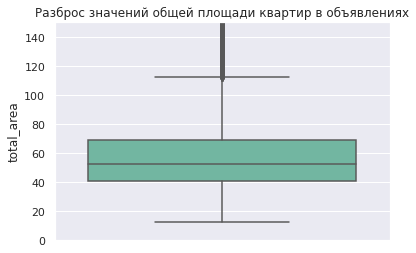

In [29]:
sns.boxplot(data=data, y='total_area')
plt.ylim(0, 150)
plt.title('Разброс значений общей площади квартир в объявлениях');

Можно заметить, что большая часть значений лежит в пределах от 15 до 115. Ограничимся этими значениями от 20 до 130.

In [30]:
data = data.query('20 <= total_area <= 130')

Перейдем к столбцу `ceiling_height`. Ограничимся его значениями в районе от 2,5 до 5 метров.

In [31]:
data = data.query('2.5 <= ceiling_height <= 5')

Рассмотрим столбец `floors_total`. Построим для этого гистограмму.

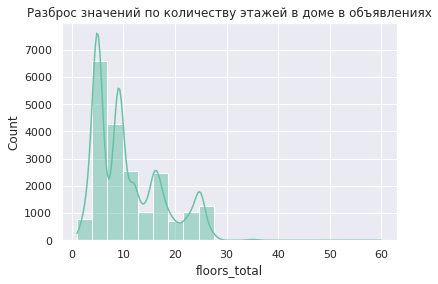

In [32]:
sns.histplot(data=data, x='floors_total', bins=20, kde=True)
plt.title('Разброс значений по количеству этажей в доме в объявлениях');

Ограничим значения в этом столбце до 30.

In [33]:
data = data[data['floors_total'] <= 30]

Подобную процедуру проделаем для столбца `living_area`, построим гистограмму.

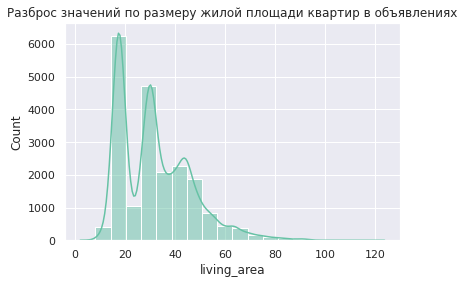

In [34]:
sns.histplot(data=data, x='living_area', bins=20, kde=True)
plt.title('Разброс значений по размеру жилой площади квартир в объявлениях');

Ограничим значения в этом столбце от 10 до 80.

In [35]:
data = data.query('10 <= living_area <= 80')

Для столбца `floor` по аналогии с `floors_total` ограничим число столбцов до 30

In [36]:
data = data[data['floor'] <= 30]

В случае со столбцом `kitchen_area` построим гистограмму для оценки разброса значений.

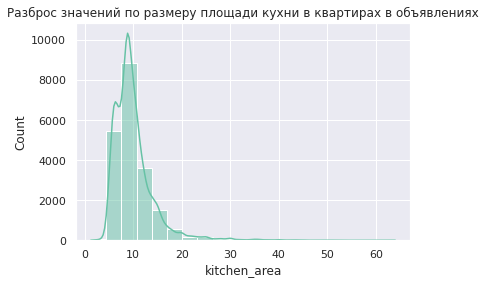

In [37]:
sns.histplot(data=data, x='kitchen_area', bins=20, kde=True)
plt.title('Разброс значений по размеру площади кухни в квартирах в объявлениях');

В соответствии с графиком ограничим диапазон значений с 5 до 25.

In [38]:
data = data.query('5 <= kitchen_area <= 25')

Для оценки значений столбца `balcony` построим гистограмму.

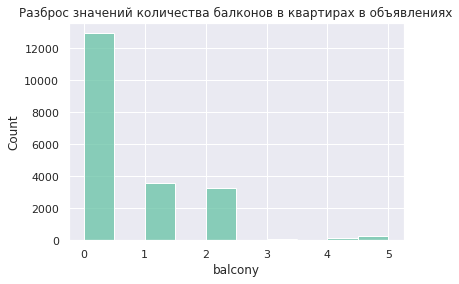

In [39]:
sns.histplot(data=data, x='balcony', bins=10)
plt.title('Разброс значений количества балконов в квартирах в объявлениях');

Ограничимся максимальным количеством балконов в размере 2-х.

In [40]:
data = data[data['balcony'] <= 2]

Рассмотрим столбец `days_exposition`. Построим для этого гистограмму.

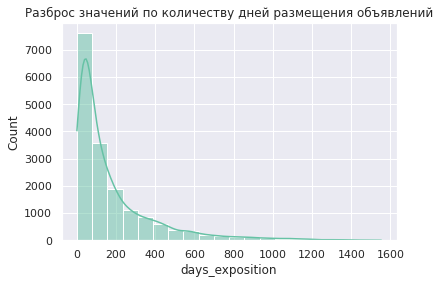

In [41]:
sns.histplot(data=data, x='days_exposition', bins=20, kde=True)
plt.title('Разброс значений по количеству дней размещения объявлений');

В соответствии с графиком ограничим диапазон значений до 1000.

In [42]:
data = data[data['days_exposition'] <= 1000]

Таким образом, все аномальные значения для каждого столбца были отброшены.

После процесса фильтрации от выбросов обновим индексы у отфильтрованного датафрейма.

In [43]:
data.reset_index(drop=True, inplace=True)

Также можно дополнительно посмотреть на то, насколько изменился наш исходный датафрейм. Изначально в нем было 23 699 строк, рассмотрим его изменение в процентном соотношении.

In [44]:
print(f'{round((1 - (len(data) / 23699)) * 100)}%')

28%


Заметим, что размер нашей исходной выборки после предобработки уменьшился на 28%.

### 3. Добавление новых столбцов

В данном разделе добавим новые информативные столбцы, которые помогут дальнейшему анализу данных.

Создадим столбец `price_per_meter`, в котором будет указана цена одного квадратного метра.

In [45]:
data['price_per_meter'] = data['last_price'] / data['total_area']

Добавим столбцы с днем, месяцем и годом публикации объявления.

In [46]:
data['exposition_day'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

Также добавим в исходный датафрейм тип этажа квартиры: "перый", "последний", "другой". Для этого напишем функцию `categorize_apartment`, которую в дальнейшем применим к столбцу `floor`.

In [47]:
def categorize_floor(floor):
    if floor['floor'] == 1:
        return 'первый'
    elif floor['floor'] == floor['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [48]:
data['floor_type'] = data[['floor', 'floors_total']].apply(categorize_floor, axis=1)

Посчитаем расстояние до центра в километрах и запишем эти значения в отдельный столбец `cityCenters_km`.

In [49]:
data['cityCenters_km'] = round(data['cityCenters_nearest'] / 1000)

### 4. Исследовательский анализ данных

После предобработки исходного датафрейма и добавления необходимых информативных столбцов займемся исследовательским анализом.

#### 4.1 Изучение основных параметров

Рассмотим и изучим следующие параметры:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Для более наглядной оценки значений приведенных параметров построим гистограммы по каждому из них. Создадим цикл, в который будем передавать название столбца, по которому нужно строить гистограмму.

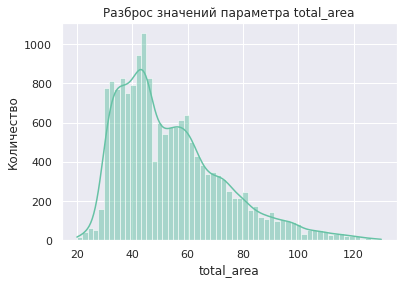

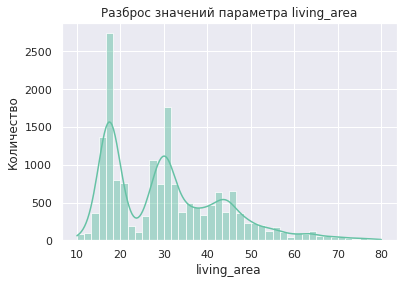

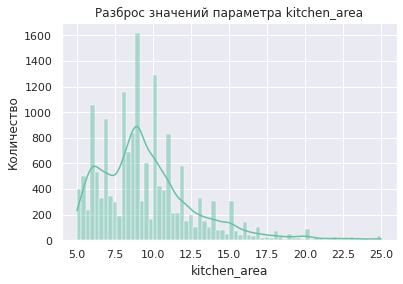

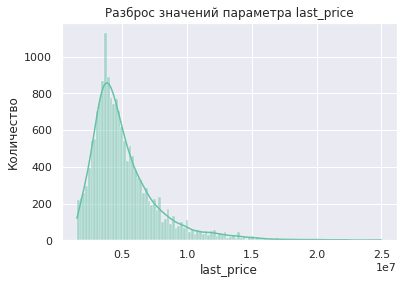

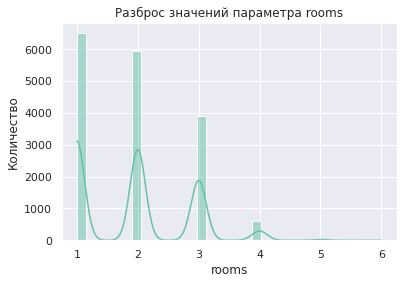

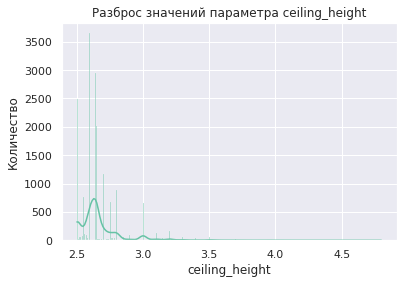

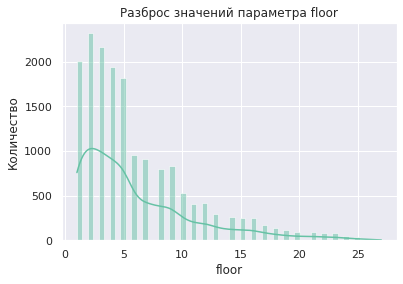

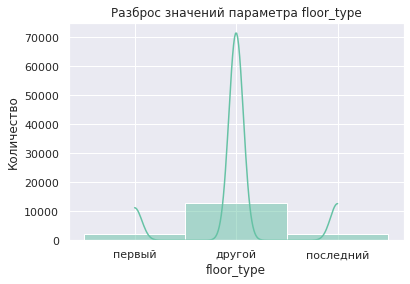

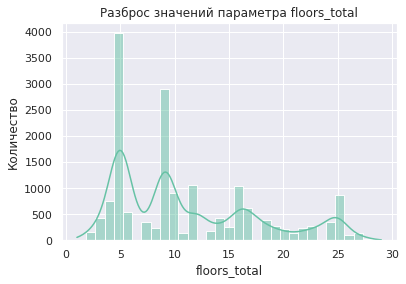

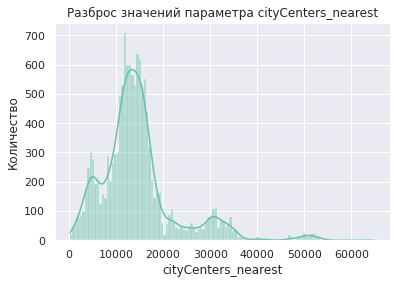

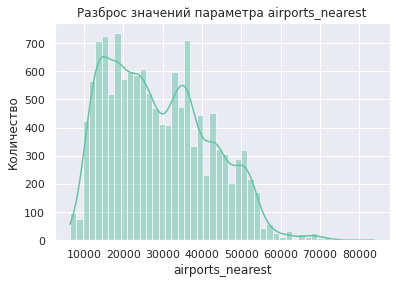

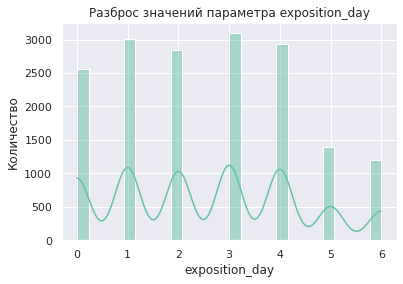

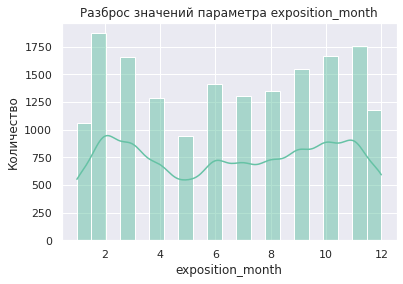

In [50]:
list = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_type', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'exposition_day', 'exposition_month']

for thing in list:
    sns.histplot(data=data, x=thing, kde=True)
    plt.title('Разброс значений параметра ' + thing)
    plt.ylabel('Количество')
    plt.show()

По полученным графикам можно сделать следующие выводы:
1. Среди всех объявлений чаще всего встречаются квартиры с площадью 30-50 квадратных метров;
2. В графике по разбросам значений жилой площади видно несколько пиковых значений: в районе 18, 30 и 45 квадратных метров. Эти значения могут быть типичными для однокомнатных, двухкомнатных и трехкомнатных квартир, которые наиболее часто встречаются в данном датафрейме;
3. Площадь кухни в среднем варьируется от 7 до 11 квадратных метров;
4. График распределения цены на момент снятия публикации имеет вид нормального распределения со средним значением в районе 4 миллионов;
5. Среди всех объявлений в приведенном датафрейме чаще всего продаются однокомнатные, двухкомнатные и трехкомнатные квартиры;
6. Типичная высота потолков в районе 2,6 метров;
7. Распределение по этажам имеет вид распределения Пуассона: чаще всего продают квартиры с 1 по 5 этаж, причем этот этаж вероятнее всего не является последним этажом в доме;
8. Большинство объявлений о продаже квартир в пятиэтажных и девятиэтажных домах;
9. В среднем квартиры расположены в 12 километрах от центра города;
10. Расстояние до аэропорта варьируется от 10 до 50 километров;
11. Объявления почти равномерно публикуются в будни, гораздо реже в выходные дни;
12. В оценке по месяцам больше всего объявлений размещаются весной и осенью.

#### 4.2 Изучение скорости продажи квартир

Изучим столбец `days_exposition`. Этот параметр показывает, сколько дней было размещено каждое объявление и как быстро продавалась квартира. Для начала посмотрим общее описание данного столбца.

In [51]:
data['days_exposition'].describe()

count    17032.000000
mean       164.812529
std        184.568635
min          1.000000
25%         44.000000
50%         93.000000
75%        217.000000
max       1000.000000
Name: days_exposition, dtype: float64

Средним значением является 144 дня, а медианным – 73 дня. В целом можно считать, что большая часть квартир продается в районе 3 месяцев.

Дополнительно построим гистограмму для более наглядной оценки значений в выданном столбце.

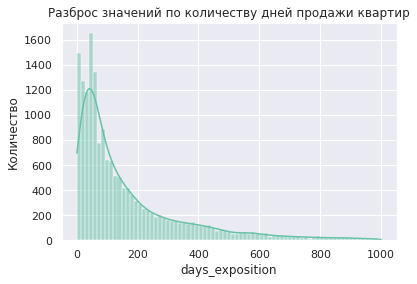

In [52]:
sns.histplot(data=data, x='days_exposition', kde=True)
plt.ylabel('Количество')
plt.title('Разброс значений по количеству дней продажи квартир');

Судя по полученной гистограмме можно сделать вывод, что большая часть объявлений о продаже были размещены очень малое количество дней (либо не были размещены вообще). Большая часть квартир в исходной выборке данных продавалась не более 150 дней.

Слишком быстрыми продажами будем считать продажу недвижимости до 50 дней, а необычно долгими – более 400 дней.

#### 4.3 Изучение факторов, влияющих на общую (полную) стоимость объекта

Рассмотрим несколько основных факторов, которые могут оказывать вляиние на итоговую стоимость недвижимости. Среди таких факторов можно выделить следующие:
- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

Для большей наглядности построим графические зависимости и сделаем по ним выводы. Будем использовать графики различного типа: **lmplot** (scatterplot с линией тенденции), **boxplot**, **lineplot** и **barplot**.

Для начала построим несколько зависимостей в виде графика **lmplot**.

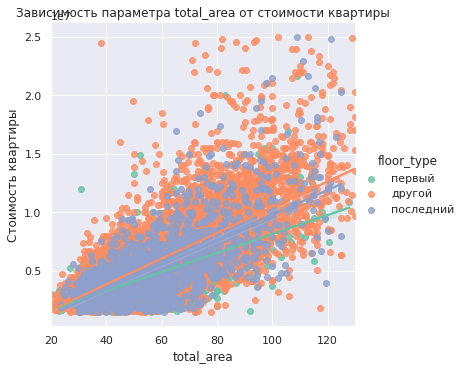

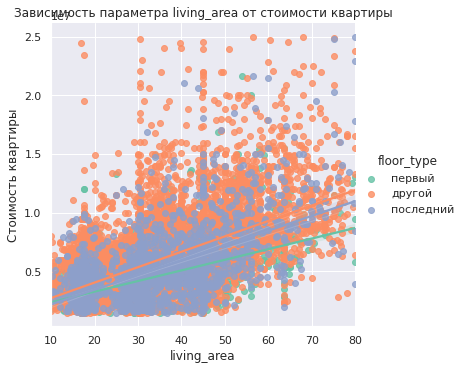

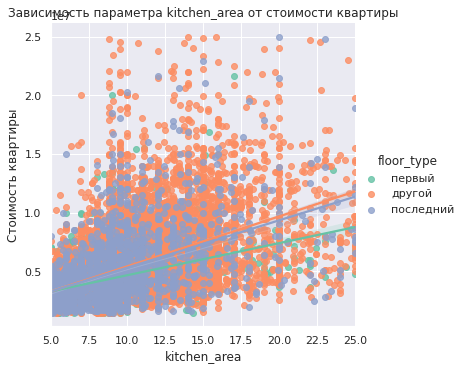

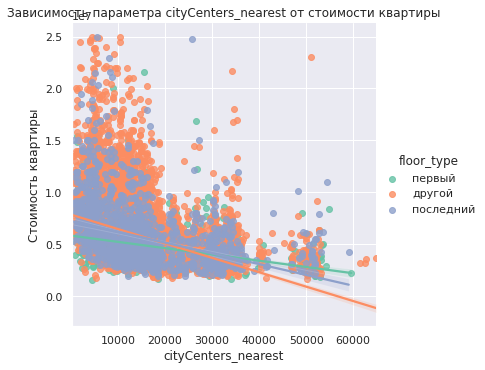

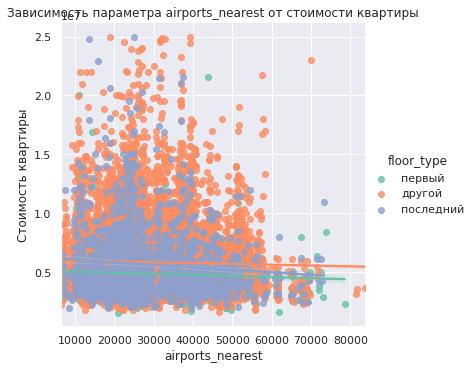

In [53]:
list = ['total_area', 'living_area', 'kitchen_area', 'cityCenters_nearest', 'airports_nearest']

for column in list:
    sns.lmplot(data=data, x=column, y='last_price', hue='floor_type')
    plt.title('Зависимость параметра ' + column + ' от стоимости квартиры')
    plt.ylabel('Стоимость квартиры')
    plt.show()

Судя по полученным графикам можно сделать следующие выводы:
1. Общая площадь недвижимости напрямую зависит от цены, причем квартиры не на первом и последним этажах зачастую оказываются дороже;
2. Соответственно жилая площадь и площадь кухни прямопропорционально зависит от цены. Больший размер кухни может свидетельствовать о большей площади квартиры, что и влияет на цену в объявлении о продаже;
3. Удаленность квартиры от центра также оказывает небольшое влияние на итоговую стоимость квартиры: чем дальше от центра, тем ниже оказывается цена;
4. Расстояние до ближайшего аэропорта не влияет на формирование цены недвижимости.

Для анализа следующих зависимостей построим графики типа **boxplot**.

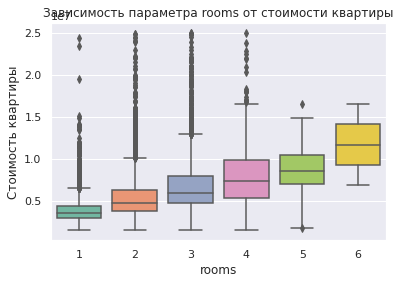

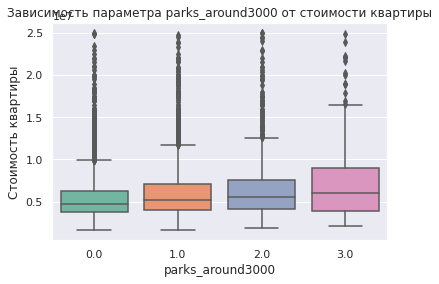

In [54]:
list = ['rooms',  'parks_around3000']

for column in list:
    sns.boxplot(data=data, x=column, y='last_price')
    plt.title('Зависимость параметра ' + column + ' от стоимости квартиры')
    plt.ylabel('Стоимость квартиры')
    plt.show()

Судя по полученным графикам можно сделать следующие выводы:
1. При увеличении количества комнат, цена на квартиру также увеличивается. Этот параметр также прямопропорционален общей площади квартиры;
2. Наличие большего количества парков в ближайшей округе также немного влияет на формирование цены, зависимость – прямопропорциональная.

Перейдем к графикам **lineplot**, также построим интересующие нас зависимости.

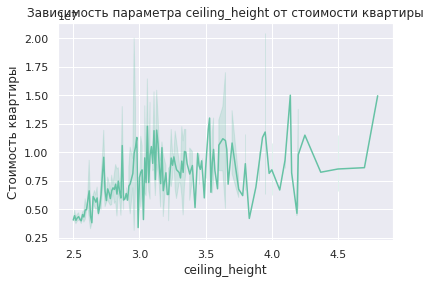

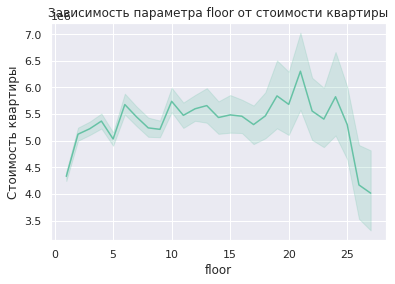

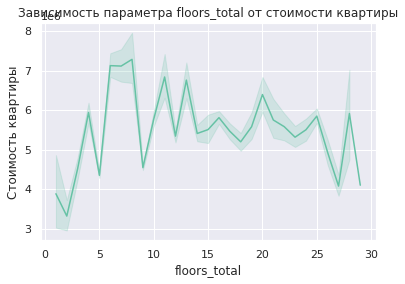

In [55]:
list = ['ceiling_height', 'floor', 'floors_total']

for column in list:
    sns.lineplot(data=data, x=column, y='last_price')
    plt.title('Зависимость параметра ' + column + ' от стоимости квартиры')
    plt.ylabel('Стоимость квартиры')
    plt.show()

Судя по полученным графикам можно сделать следующие выводы:
1. Можно заметить слабую тенденцию по увеличению цены при увеличении высоты потолков;
2. При увеличении этажа квартиры влоть до 21 в среднем наблюдается рост цены;
3. В среднем самые дорогие квартиры продаются в 8-этажных и 11-этажных домах.

Для анализа следующих зависимостей построим графики типа **boxplot**.

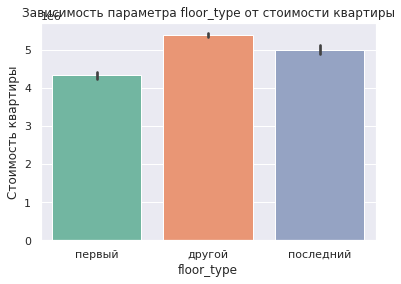

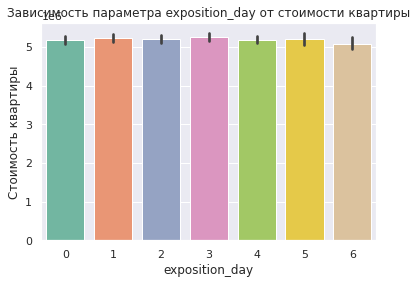

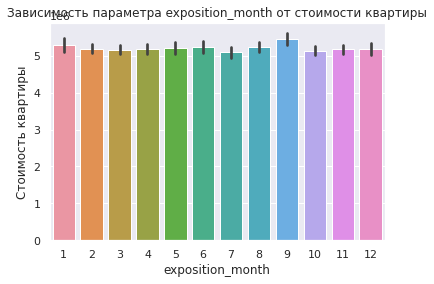

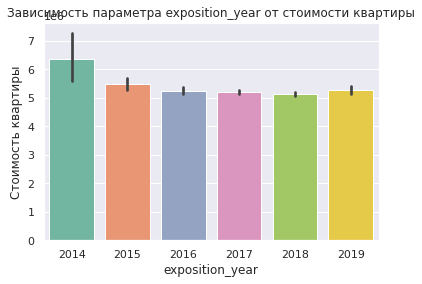

In [56]:
list = ['floor_type', 'exposition_day', 'exposition_month', 'exposition_year']

for column in list:
    sns.barplot(data=data, x=column, y='last_price')
    plt.title('Зависимость параметра ' + column + ' от стоимости квартиры')
    plt.ylabel('Стоимость квартиры')
    plt.show()

Судя по полученным графикам можно сделать следующие выводы:
1. Квартиры, продающиеся ни на первом, ни на последнем этажах, зачастую оказываются дороже. Квартиры на первом этаже в среднем оказываются самыми дешевыми на фоне других групп;
2. День публикации не оказывает влияние на формирование цены недвижимости;
3. Объявления с более дорогими квартирами чаще всего выставляются в сентябре;
4. В 2014-м году стоимость квартиры была выше, чем в последующие года.

На фоне полученных графиков можно сделать общие выводы в текущем подразделе по факторам, влияющим на общую стоимость объектов недвижимости:
1. Одним из основных факторов, влияющих на итоговую стоимость, является общая площадь квартиры, зависимость – прямопропорциональная. Причем квартиры, расположенные ни на первом, ни на последнем этажах, оказываются дороже;
2. Другим важным фактором является отдаленность от центра города: чем ближе к центру города расположена квартира, тем дороже она продается;
3. Большее количество комнат прямопроционально влияет на итоговую стоимость (по аналогии с общей площадью);
4. Большее количество парков поблизости также немного увеличивает стоимость недвижимости;
5. Чем выше расположена квартира, тем дороже ее стоимость;
6. В среднем самыми дорогими являются 8-этажные и 11-этажные дома;
7. День недели выставления объявления о продаже квартиры не влияет на итоговую стоимость;
8. Выгоднее всего продавать квартиру в сентябре, летом наблюдается небольшая просадка в стоимости.

#### 4.4 Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

При расчете средней цены одного квадратного метра для населенных пунктов воспользуемся сводными таблицами.

Выведем 10 населенных пунктов с наибольшим количеством объявлений и рассмотрим у них среднюю цену за квадратный метр.

In [57]:
table_by_count_dec = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc={'count', 'mean', 'median'}).sort_values('count', ascending=False)
table_by_count_dec.columns = ['Количество', 'Среднее значение', 'Медианное значение']

table_by_count_dec.head(10)

,Количество,Среднее значение,Медианное значение
locality_name,,,
Санкт-Петербург,11488,107268.920884,102088.178295
поселок Мурино,488,85108.055097,84262.422360
поселок Шушары,366,78005.983822,76666.666667
Всеволожск,300,69091.711536,65811.403509
поселок Парголово,286,89460.341556,91387.362637
деревня Кудрово,255,92707.145247,91666.666667
Колпино,253,74837.957237,74097.135741
Пушкин,250,101932.839661,98325.892857
Гатчина,238,68361.131180,67671.510409


Можно заметить, что больше всего объявлений из Санкт-Петербурга, где средняя цена за квадратный метр в среднем 107 тысяч рублей. Среди данных населенных пунктов выделяется поселок Мурино, у которого средняя цена за квадратный метр равняется 85 тысячам рублей и Пушкин, у которого этот показатель равен 102 тысячам рублей.

Также дополнительно посчитаем среднюю цену для данных 10 населенных пунктов с наибольшим количеством объявлений.

In [58]:
table_by_count_dec['Среднее значение'].head(10).mean()

82544.8201593665

Средняя цена для этих 10 населенных пунктов составила 83 тысячи рублей.

Далее рассмотрим 10 населенных пунктов с наименьшим количеством объявлений.

In [59]:
table_by_count_dec.tail(10)

,Количество,Среднее значение,Медианное значение
locality_name,,,
поселок Гончарово,1,41371.158392,41371.158392
поселок Глебычево,1,37884.615385,37884.615385
поселок Глажево,1,28571.428571,28571.428571
поселок Гладкое,1,30769.230769,30769.230769
поселок Высокоключевой,1,34931.506849,34931.506849
поселок Возрождение,1,29054.054054,29054.054054
поселок Вознесенье,1,38834.951456,38834.951456
поселок Вещево,1,49833.333333,49833.333333
поселок Белоостров,1,66666.666667,66666.666667


Все населенные пункты в данном списке имеют по одному объявлению. Среди них выделяется поселок Белоостров с ценой за квадратный метр в районе 66 тысяч рублей. Для остальных позиций в этом списке средняя цена оказывается равна в среднем 35 тысчяч рублей.

Отдельно выделим два населенных пункта с самой наибольшей ценой за квадратный метр и самой наименьшей.

In [60]:
table_by_mean_dec = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc={'count', 'mean', 'median'}).sort_values('mean', ascending=False)
table_by_mean_dec.columns = ['Количество', 'Среднее значение', 'Медианное значение']

table_by_mean_dec.head(10)

,Количество,Среднее значение,Медианное значение
locality_name,,,
Зеленогорск,18,115630.981023,103995.680346
поселок Лисий Нос,2,113728.348730,113728.348730
Санкт-Петербург,11488,107268.920884,102088.178295
Сестрорецк,142,103188.396379,99166.666667
Пушкин,250,101932.839661,98325.892857
Кудрово,132,98405.881888,98604.283281
поселок Левашово,1,96997.690531,96997.690531
деревня Мистолово,9,96157.152893,90229.885057
деревня Кудрово,255,92707.145247,91666.666667


Населенным пунктом с самой большой ценой за квадратный метр является Зеленогорск, цена у которого равняется 116 тысячам рублей. Разница с Санкт-Петербургом, у которого наибольшее количество объявлений в данной выборке, составляет около 10 тысячи рублей.

Найдем населенный пункт с наименьшей ценой за квадратный метр.

In [61]:
table_by_mean_dec.tail(10)

,Количество,Среднее значение,Медианное значение
locality_name,,,
деревня Большая Пустомержа,1,28037.383178,28037.383178
поселок Кузнечное,2,28015.498652,28015.498652
село Паша,1,27627.118644,27627.118644
деревня Шпаньково,1,27352.941176,27352.941176
деревня Калитино,1,27232.924694,27232.924694
Подпорожье,3,26794.077299,26865.671642
Пикалево,1,26680.896478,26680.896478
Сланцы,3,23154.490107,21232.876712
поселок Никольский,1,20862.308762,20862.308762


Таким населенным пунктом является Бокситогорск с ценой 19 тысяч за квадратный метр.

#### 4.5 Формирование итоговой цены недвижимости в зависимости от расстояния до центра Санкт-Петербурга

Рассмотрим влияние стоимости квартиры в зависимости от ее расположения относительно центра города Санкт-Петербург. Для этого из общей выборки выделим данные, относящиеся к выбранному городу.

In [62]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']

Далее построим сводную таблицу для расчета стоимости квадратного метра для каждого километра удаляясь от центра.

In [63]:
price_per_km = data_spb.pivot_table(index='cityCenters_km', values='price_per_meter', aggfunc={'mean', 'median'}).sort_values('cityCenters_km')
price_per_km.columns = ['Среднее значение', 'Медианное значение']

price_per_km

,Среднее значение,Медианное значение
cityCenters_km,,
0.0,124302.791825,109900.000000
1.0,131373.573158,117647.058824
2.0,127136.686473,116932.124479
3.0,110857.727659,105250.000000
4.0,122408.015803,113568.048671
5.0,128367.988033,122754.145638
6.0,127423.773740,121065.983566
7.0,123783.327547,115849.056604
8.0,119709.987540,117699.115044


Нетрудно заметить, что при отдалении от центра средняя цена за квадратный метр уменьшается. Построим график, на котором можно будет более наглядно увидеть интересующую зависимость.

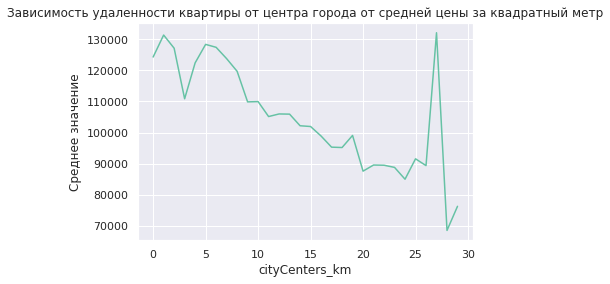

In [64]:
sns.lineplot(data=price_per_km, x='cityCenters_km', y='Среднее значение')
plt.title('Зависимость удаленности квартиры от центра города от средней цены за квадратный метр');

Данная закономерность на графике подтвердилась. Однако, на 27 километре можно увидеть выброс, который может быть обусловлен элитным статусом продаваемого жилья.

### Общий вывод

В данной работе были проанализированы данные об объявлениях о продаже недвижимости, произведена их предобработка с заполнением пропусков в данных, обработаны выбросы в каждом столбце, удалены дубликаты. Необходимо было выявить основные факторы, влияющие на итоговую стоимость квартиры. Среди них были рассмотрены:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры;
- общее количество этажей в доме;
- расстояние до центра города;
- расстояние до ближайшего аэропорта;
- день и месяц публикации объявления.

Было выявлено, что
1. Одним из основных факторов, влияющих на итоговую стоимость, является общая площадь квартиры, зависимость – прямопропорциональная. Причем квартиры, нерасположенные на первом или последнем этажах, зачастую оказываются дороже;
2. Отдаленность от центра города тоже играет немаловажную роль при формировании цены на недвижимость: чем ближе к центру города расположена квартира, тем дороже ее цена;
3. Большее количество комнат прямопроционально влияет на итоговую стоимость (по аналогии с общей площадью);
4. Большее количество парков поблизости также немного увеличивает стоимость недвижимости;
5. Чем выше расположена квартира, тем дороже оказывается ее стоимость;
6. Выгоднее всего продавать квартиру в сентябре, летом наблюдается небольшая просадка в стоимости;
7. В Санкт-Петербурге цена за километр до центра имеет обратнопропорциональную зависимость: чем дальше от центра расположена квартира, тем ниже оказывается цена за километр до центра города, что также влияет на итоговую стоимость в объявлении.

Для более подробного изучения датафрейма и поиска новых параметров, влияющих на итоговую стоимость недвижимости, рекомендуется устранить пропуски в столбцах, показывающих расстояние до ближайшего парка и пруда, а также получить данные о том, является ли данный вид жилья апартаментами или нет.